<a href="https://colab.research.google.com/github/smruti0301/data-science-exp/blob/main/EXP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FEATURE SELECTION**

Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp


Feature selection models are of two types:

**Supervised Models**: Supervised feature selection refers to the method which uses the output label class for feature selection. They use the target variables to identify the variables which can increase the efficiency of the model

**Unsupervised Models**: Unsupervised feature selection refers to the method which does not need the output label class for feature selection. We use them for unlabelled data.

**Filter Method**: In this method, features are dropped based on their relation to the output, or how they are correlating to the output. We use correlation to check if the features are positively or negatively correlated to the output labels and drop features accordingly. Eg: Information Gain, Chi-Square Test

**INFORMATION GAIN**

It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection.

In [4]:
df=pd.read_csv("HeartDiseaseTrain-Test.csv")
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


**ENTROPY**

In [11]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = '/content/HeartDiseaseTrain-Test.csv'
data = pd.read_csv(file_path)

# Get the target variable
target = data['target']

# Calculate the proportions of each class in the target variable
class_counts = target.value_counts(normalize=True)

# Calculate entropy
entropy = -np.sum(class_counts * np.log2(class_counts))

print(f'Entropy of target: {entropy}')

Entropy of target: 0.9994994187527655


In [9]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load your dataset
file_path = '/content/HeartDiseaseTrain-Test.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Convert categorical variables into dummy/indicator variables
X_encoded = pd.get_dummies(X)

# Calculate mutual information (information gain)
info_gain = mutual_info_classif(X_encoded, y)

# Create a DataFrame to display the results
info_gain_df = pd.DataFrame({'Feature': X_encoded.columns, 'Information Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Show top features with the highest information gain
print(info_gain_df.head(10))  # Show top 10 features with the highest information gain


                               Feature  Information Gain
2                          cholestoral          0.283511
3                       Max_heart_rate          0.166498
4                              oldpeak          0.160723
10      chest_pain_type_Typical angina          0.152410
26            thalassemia_Fixed Defect          0.136991
25  vessels_colored_by_flourosopy_Zero          0.127544
16          exercise_induced_angina_No          0.113932
17         exercise_induced_angina_Yes          0.111148
29       thalassemia_Reversable Defect          0.100073
0                                  age          0.077354


**CHI-SQUARE TEST**

is a statistical method crucial for analyzing associations in categorical data. Its applications span various fields, aiding researchers in understanding relationships between factors.

In [12]:

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/HeartDiseaseTrain-Test.csv'  # Replace with your actual path
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('target', axis=1)  # Assuming 'target' is your dependent variable
y = data['target']

# Convert categorical variables into dummy/indicator variables
X_encoded = pd.get_dummies(X)

# Apply Chi-Square test
chi_scores, p_values = chi2(X_encoded, y)

# Create a DataFrame to display the results
chi2_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi-Square Score': chi_scores,
    'p-value': p_values
})

# Sort by Chi-Square score (higher values indicate higher association with the target)
chi2_df = chi2_df.sort_values(by='Chi-Square Score', ascending=False)

# Show top 10 features with highest Chi-Square score
print(chi2_df.head(10))


                               Feature  Chi-Square Score        p-value
3                       Max_heart_rate        650.008493  2.224662e-143
4                              oldpeak        253.653461   4.149300e-57
10      chest_pain_type_Typical angina        142.563300   7.323424e-33
29       thalassemia_Reversable Defect        141.524151   1.235747e-32
17         exercise_induced_angina_Yes        130.470927   3.232318e-30
26            thalassemia_Fixed Defect        129.833983   4.455248e-30
2                          cholestoral        110.723364   6.803149e-26
25  vessels_colored_by_flourosopy_Zero         97.060821   6.723013e-23
18                   slope_Downsloping         84.195255   4.482452e-20
0                                  age         81.425368   1.820066e-19


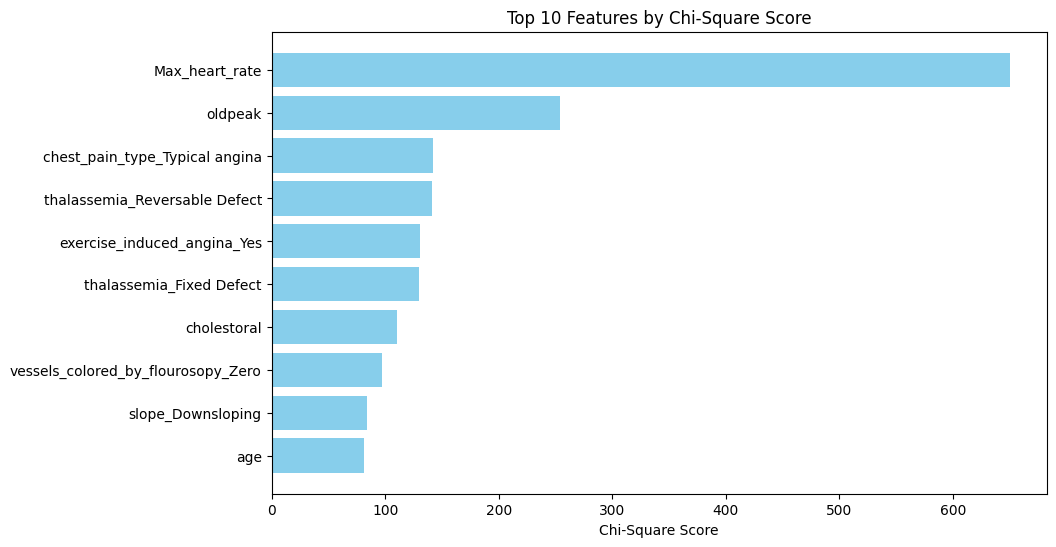

In [13]:
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/HeartDiseaseTrain-Test.csv'  # Replace with your actual path
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('target', axis=1)  # Assuming 'target' is your dependent variable
y = data['target']

# Convert categorical variables into dummy/indicator variables
X_encoded = pd.get_dummies(X)

# Apply Chi-Square test
chi_scores, p_values = chi2(X_encoded, y)

# Create a DataFrame to display the results
chi2_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi-Square Score': chi_scores,
    'p-value': p_values
})

# Sort by Chi-Square score (higher values indicate higher association with the target)
chi2_df = chi2_df.sort_values(by='Chi-Square Score', ascending=False)

# Plotting the Chi-Square scores
plt.figure(figsize=(10, 6))
plt.barh(chi2_df['Feature'][:10], chi2_df['Chi-Square Score'][:10], color='skyblue')
plt.xlabel('Chi-Square Score')
plt.title('Top 10 Features by Chi-Square Score')
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()


**Pearsons's co-relation**

Pearson's correlation is a statistical measure that assesses the strength and direction of the linear relationship between two continuous variables. In the context of machine learning, understanding these correlations can help you identify which features in your dataset are related, which can inform feature selection and engineering.

The coefficient ranges from -1 to 1.

1: Perfect positive correlation (as one variable increases, the other also increases).

-1: Perfect negative correlation (as one variable increases, the other decreases).

0: No correlation (no linear relationship between the variables).

Correlation with the target variable:
 target                                      1.000000
vessels_colored_by_flourosopy_Zero          0.465981
Max_heart_rate                              0.422895
chest_pain_type_Non-anginal pain            0.319504
chest_pain_type_Atypical angina             0.255288
rest_ecg_ST-T wave abnormality              0.178573
fasting_blood_sugar_Lower than 120 mg/ml    0.041164
thalassemia_No                             -0.014035
slope_Upsloping                            -0.075227
thalassemia_Normal                         -0.095541
cholestoral                                -0.099966
resting_blood_pressure                     -0.138772
rest_ecg_Normal                            -0.160308
vessels_colored_by_flourosopy_Three        -0.205720
age                                        -0.229324
vessels_colored_by_flourosopy_One          -0.235299
vessels_colored_by_flourosopy_Two          -0.276566
sex_Male                                   -0.279501
slope_F

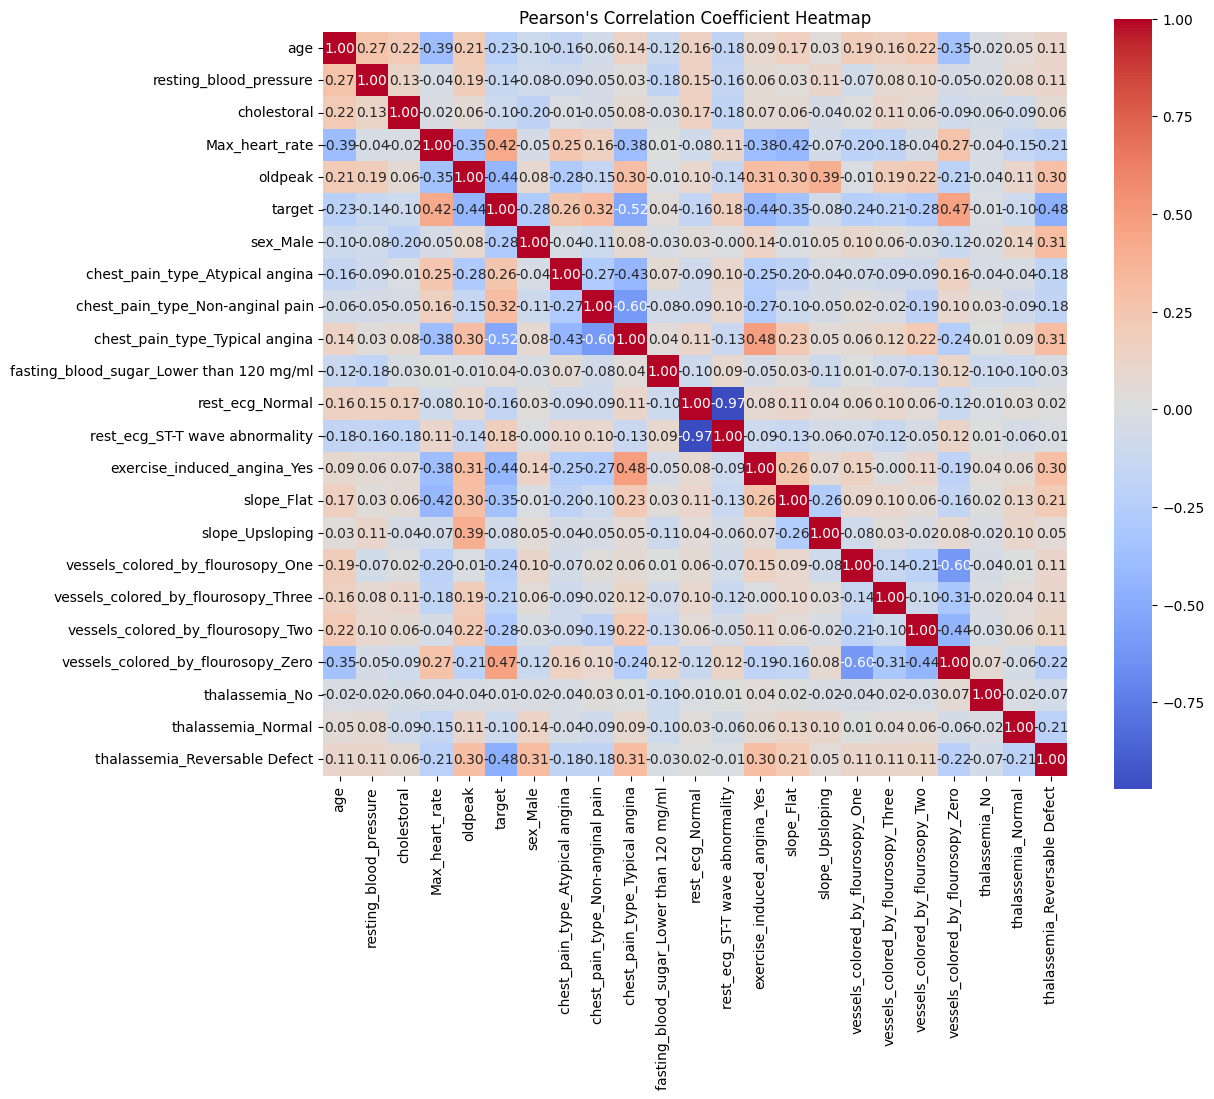

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/HeartDiseaseTrain-Test.csv'  # Replace with your actual path
data = pd.read_csv(file_path)

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate Pearson's correlation matrix
correlation_matrix = data_encoded.corr(method='pearson')

# Display the correlation with respect to the target variable
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation with the target variable:\n", target_correlation)

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Pearson's Correlation Coefficient Heatmap")
plt.show()



**ANOVA**

ANOVA (Analysis of Variance) is a statistical technique used to compare the means of three or more groups to see if at least one group mean is significantly different from the others. It helps researchers determine whether any observed differences between groups are due to chance or if they are statistically significant.

Types of ANOVA

One-Way ANOVA: Tests the effect of a single factor on a dependent variable.

Two-Way ANOVA: Tests the effects of two factors and their interaction.

Repeated Measures ANOVA: Used when the same subjects are measured multiple times.

In [20]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
file_path = '/content/HeartDiseaseTrain-Test.csv'  # Replace with your actual path
data = pd.read_csv(file_path)

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Define the target variable
target = data_encoded['target']

# Create a list to store ANOVA results
anova_results = []

# Perform ANOVA for each feature against the target variable
for feature in data_encoded.columns:
    if feature != 'target':  # Skip the target variable itself
        # Create groups for each unique value in the feature
        groups = [data_encoded[data_encoded[feature] == value]['target'] for value in data_encoded[feature].unique()]

        # Perform ANOVA
        f_statistic, p_value = f_oneway(*groups)

        # Store results
        anova_results.append({'Feature': feature, 'F-Statistic': f_statistic, 'p-value': p_value})

# Convert the results list to a DataFrame
anova_results_df = pd.DataFrame(anova_results)

# Sort results by F-Statistic and display the top features
anova_results_df = anova_results_df.sort_values(by='F-Statistic', ascending=False)
print(anova_results_df.head(10))



                               Feature  F-Statistic       p-value
8       chest_pain_type_Typical angina   378.381863  5.858843e-72
21       thalassemia_Reversable Defect   305.779496  4.166116e-60
18  vessels_colored_by_flourosopy_Zero   283.744221  2.222871e-56
12         exercise_induced_angina_Yes   242.883889  2.694932e-49
13                          slope_Flat   142.270121  8.408776e-31
7     chest_pain_type_Non-anginal pain   116.303376  9.313457e-26
5                             sex_Male    86.689707  7.523831e-20
17   vessels_colored_by_flourosopy_Two    84.728520  1.878707e-19
6      chest_pain_type_Atypical angina    71.318896  1.031026e-16
15   vessels_colored_by_flourosopy_One    59.958564  2.321432e-14


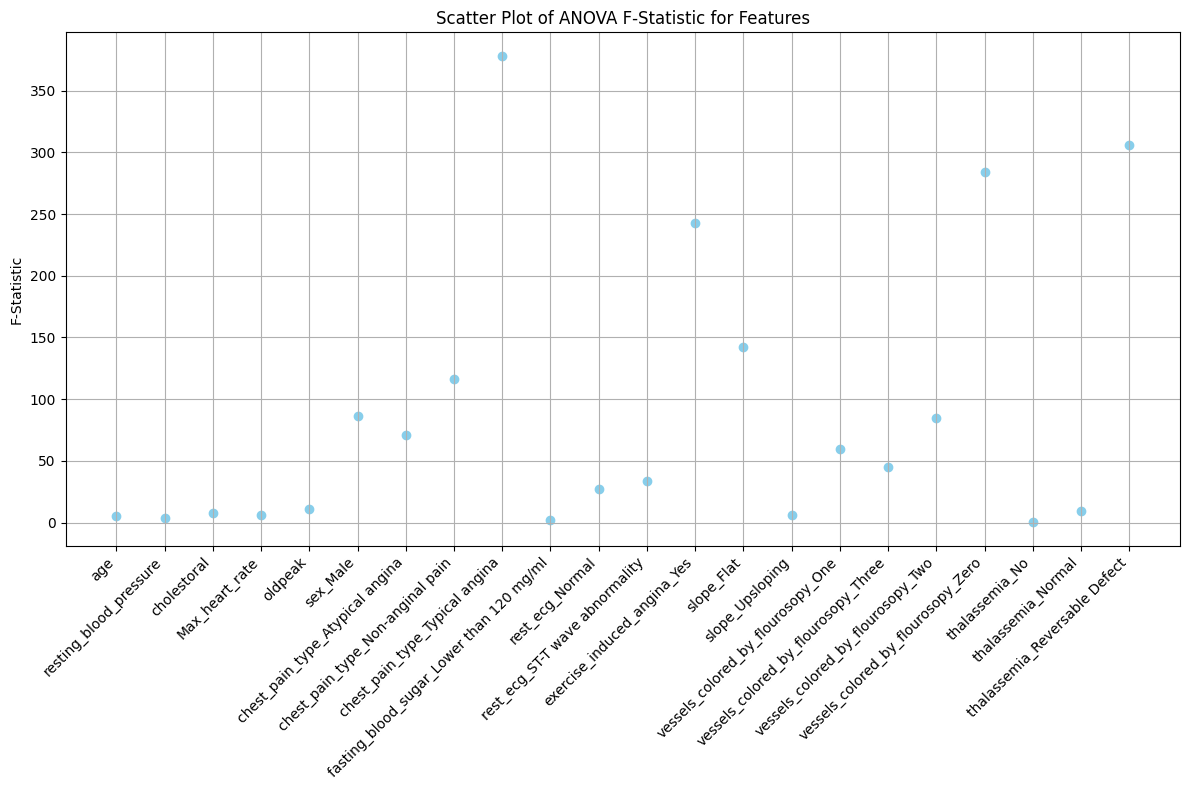

In [22]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(anova_results_df.index, anova_results_df['F-Statistic'], color='skyblue')
plt.xticks(ticks=anova_results_df.index, labels=anova_results_df['Feature'], rotation=45, ha='right')
plt.ylabel('F-Statistic')
plt.title('Scatter Plot of ANOVA F-Statistic for Features')
plt.grid()
plt.tight_layout()
plt.show()